# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Big Data Real-Time Analytics com Python e Spark</font>

<br><br>

# <center>Mini-Projeto 1 </center>
## Modelagem Preditiva para Identificação de Risco de Doença Hepática

<br>

### Etapas:

- Construção, Treinamento, Avaliação e Seleção de Modelos para <u>Classificação</u>

### Introdução:
- Vamos trabalhar agora em nosso primeiro Mini-Projeto de Machine Learning, cujo objetivo é fornecer um passo a passo completo do processo de construção, treinamento, avaliação e seleção de modelos para classificação. Este projeto será abordado de maneira integral, desde a definição do problema de negócio até as previsões com o modelo treinado.

### Contexto:

- O número de pacientes com doença hepática tem aumentado continuamente devido a fatores como consumo excessivo de álcool, inalação de gases nocivos, ingestão de alimentos contaminados, e uso de drogas e anabolizantes. Em resposta a essa crescente preocupação de saúde pública, este mini-projeto visa construir um modelo de Machine Learning capaz de prever se um paciente irá ou não desenvolver uma doença hepática com base em várias características clínicas e demográficas. Este modelo pode ser extremamente útil para médicos, hospitais ou governos no planejamento de orçamentos de saúde e na criação de políticas de prevenção eficazes.

<br>

### Sobre os Dados:

https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

- Os dados para este projeto são provenientes do "Indian Liver Patient Dataset", disponível no link acima. Este conjunto de dados contém registros de pacientes hepáticos e não hepáticos coletados na Índia. A coluna "Dataset" atua como um rótulo de classe, dividindo os indivíduos em pacientes com doença hepática (1) ou sem a doença (2).

<br>
<table border="2">
  <tr>
    <th style="text-align: center; font-size: 16px;">Nome da Coluna</th>
    <th style="text-align: center; font-size: 16px;">Tipo de Dado</th>
    <th style="text-align: center; font-size: 16px;">Descrição</th>
  </tr>
  <tr>
    <td>Age</td>
    <td>Int</td>
    <td>Idade do paciente em anos.</td>
  </tr>
  <tr>
    <td>Gender</td>
    <td>Character(1)</td>
    <td>Gênero do paciente, representado como 'Male' ou 'Female'.</td>
  </tr>
  <tr>
    <td>Total_Bilirubin</td>
    <td>Float</td>
    <td>Total de bilirrubina no sangue, medido em mg/dL.</td>
  </tr>
  <tr>
    <td>Direct_Bilirubin</td>
    <td>Float</td>
    <td>Bilirrubina direta no sangue, medido em mg/dL.</td>
  </tr>
  <tr>
    <td>Alkaline_Phosphotase</td>
    <td>Int</td>
    <td>Nível de fosfatase alcalina no sangue, medido em IU/L.</td>
  </tr>
  <tr>
    <td>Alamine_Aminotransferase</td>
    <td>Int</td>
    <td>Nível de alanina aminotransferase no sangue, uma enzima hepática, medido em IU/L.</td>
  </tr>
  <tr>
    <td>Aspartate_Aminotransferase</td>
    <td>Int</td>
    <td>Nível de aspartato aminotransferase no sangue, uma enzima hepática, medido em IU/L.</td>
  </tr>
  <tr>
    <td>Total_Protiens</td>
    <td>Float</td>
    <td>Total de proteínas no soro do sangue, medido em g/dL.</td>
  </tr>
  <tr>
    <td>Albumin</td>
    <td>Float</td>
    <td>Nível de albumina no sangue, medido em g/dL.</td>
  </tr>
  <tr>
    <td>Albumin_and_Globulin_Ratio</td>
    <td>Float</td>
    <td>Razão entre albumina e globulina no sangue, um indicativo de função hepática.</td>
  </tr>
  <tr>
    <td>Dataset</td>
    <td>Int</td>
    <td>Variável alvo, indicando presença (1) ou ausência (2) de doença hepática.</td>
  </tr>
</table>



<br>

### Objetivo:

- Nosso **objetivo** é prever uma classe (sim ou não), usaremos aprendizado supervisionado para **classificação**,   criando   diferentes   versões   do   modelo   com   diferentes algoritmos e passaremos por todo o processo de Machine Learning de ponta a ponta. Usaremos como fonte de dados o dataset disponível no link a seguir.




<br><br><br>
## Importando Pacotes

In [1]:
# Manipulação de Dados
import numpy as np
import pandas as pd

# Criação e Visualização de Gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Carrega a função SMOTE (Balanceamento de Classes)
import imblearn
from imblearn.over_sampling import SMOTE

# Pacote do Python para Machine Learning
import sklearn

# Função model_selection do pacote sklearn
from sklearn.model_selection import train_test_split    # dividir os dados em treino e teste
from sklearn.model_selection import GridSearchCV        # técnica de utilização de hiperparâmetros
from sklearn.model_selection import RandomizedSearchCV  # técnica de utilização de hiperparâmetros
from sklearn.model_selection import cross_val_score     # validação cruzada (para avaliação do modelo)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


## Pacotes do sklearn com os Algoritmos

# Função com Algoritmo de ML (Regressão Logística)
from sklearn.linear_model import LogisticRegression     

# Função com Algoritmo de ML (RandomForest)
from sklearn.ensemble import RandomForestClassifier

# Função com Algoritmo de ML (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Função com Algoritmo de ML (Árvores de Decisão)
from sklearn.tree import DecisionTreeClassifier

# Função com Algoritmo de ML (SVC)
from sklearn.svm import SVC

# Calcular as Métricas para Avaliação dos Modelos
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score

# Salvar o modelo após o treinamento
import joblib
import pickle

# Indicando que os Gráficos apareçam no Jupyter Notebook
%matplotlib inline

# Mensagens de Aviso
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carrega os dados
dados = pd.read_csv('dados/dataset.csv')

In [3]:
# Shape
dados.shape

(583, 11)

<br><br>
# Carregando o Conjunto de Dados
- Nesta etapa é feito o **carregamento** dos dados.

<br>

In [4]:
# Nome Colunas
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [5]:
# Visualiza uma Amostra
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
11,72,Male,2.7,1.3,260,31,56,7.4,3.0,0.6,1
539,65,Female,0.7,0.2,406,24,45,7.2,3.5,0.9,2
292,45,Male,0.6,0.2,245,22,24,7.1,3.4,0.9,1
255,38,Male,1.7,0.7,859,89,48,6.0,3.0,1.0,1
201,49,Male,0.6,0.1,218,50,53,5.0,2.4,0.9,1


<br><br>
# Análise Exploratória de Dados
- Nesta etapa verificamos o **tipo dos dados**, **correlações** e **interpretação** dos dados.

<br><br>

#### Verificando Tipo de Dados

In [6]:
# Tipo de Dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


#### Visualizando Variáveis Categóricas e Numéricas

In [7]:
# Exibindo Variáveis Categóricas (filtrando)
dados.dtypes[dados.dtypes == 'object']

Gender    object
dtype: object

In [8]:
# Exibindo Variáveis Numéricas (filtrando)
dados.dtypes[dados.dtypes != 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

<br><br>

## Explorando Variáveis Numéricas

#### Resumo Estatístico

In [9]:
# Describe
dados.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


<br>

#### Visualizando através de Gráficos

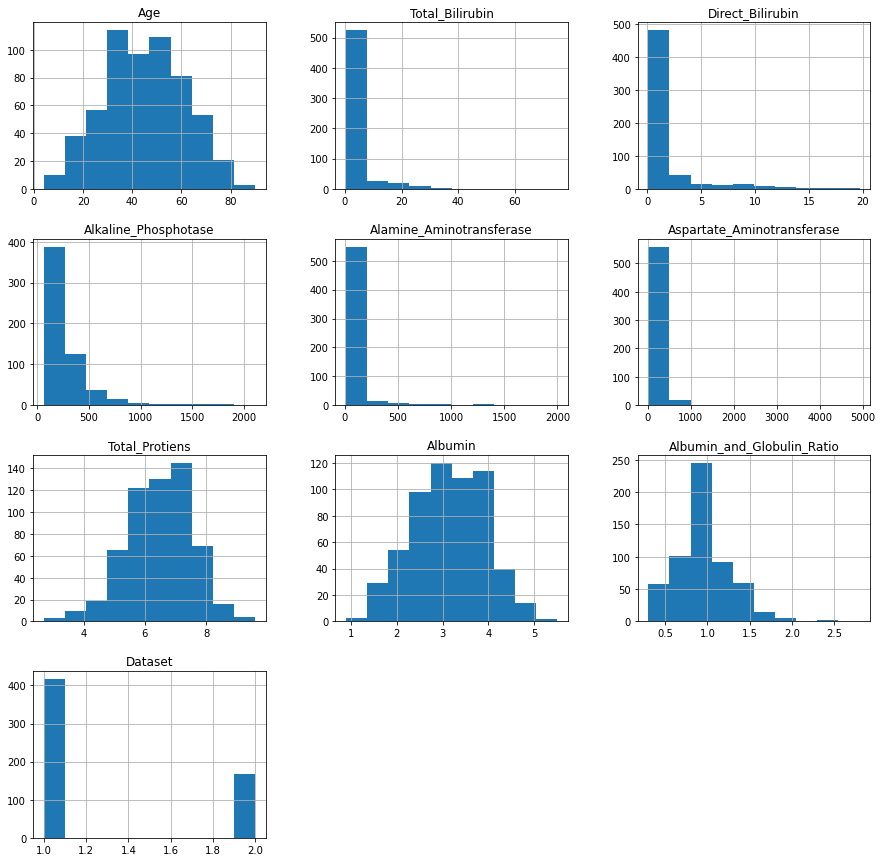

In [10]:
# Plot
dados.hist(figsize = (15,15), bins = 10) 
plt.show()

#### Interpretando o Resumo e Gráficos

- Parece que há outlier nas variáveis **Alamine_Aminotransferase**, **Aspartate_Aminotransferase**, pois o valor máximo é muito mais alto que o valor médio.
- A coluna **Dataset** (que será posteriormente renomeada para Target) tem '1' para doença hepática e '2' para nenhuma doença hepática. Vamos ajustar a variável colocando valores mais fáceis de interpretar. A classe negativa (não tem a doença) será zero.

<br>

#### Ajustando coluna 'Dataset' (editando valores e renomeando para 'Target')

In [11]:
# Criando Função para ajustar a variável target (modificando todos valores 2 para 0)
def ajusta_var(x):
    if x == 2:
        return 0
    return 1

# Aplica a função
dados['Dataset'] = dados['Dataset'].map(ajusta_var)

In [12]:
# Renomeando coluna 'Dataset' para 'Target'
dados.rename({'Dataset':'Target'}, axis = 'columns', inplace = True)

In [13]:
# Visualizando
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
436,23,Male,1.0,0.3,212,41,80,6.2,3.1,1.00,1
170,72,Male,1.7,0.8,200,28,37,6.2,3.0,0.93,1
166,55,Male,75.0,3.6,332,40,66,6.2,2.5,0.60,1
360,24,Male,0.7,0.2,218,47,26,6.6,3.3,1.00,1
279,48,Female,1.0,1.4,144,18,14,8.3,4.2,1.00,1


<br>

### Exploração Variável Categórica

<br>

In [14]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Target                      583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


#### Resumo

In [15]:
# Describe (informando que é para somente variáveis categóricas)
dados.describe(include = ['object'])

,Gender
count,583
unique,2
top,Male
freq,441


In [16]:
# Verificando Tipo de Valores
dados['Gender'].unique()

array(['Female', 'Male'], dtype=object)

#### Visualizando através de Gráfico

In [ ]:
# Plot
sns.countplot(data = dados, x = 'Gender', label = 'Count')

# Value counts
M, F = dados['Gender'].value_counts()

# Print
print('Número de pacientes do sexo masculino: ', M)
print('Número de pacientes do sexo feminino: ', F)

### Aplicando Label Encoding
#### Vamos transformar a variável **Categórica** Gender na sua represetação **Numérica**

In [ ]:
# Função para label encoding ('Male' = 0 e 'Female' = 1)
def encoding_func(x):
    if x == 'Male':
        return 0
    return 1

# Aplica a função
dados['Gender'] = dados['Gender'].map(encoding_func)

In [ ]:
# Visualiza os dados
dados.sample(5)

<br>

### Verificando Correlação Entre os Atributos 

#### Tabela Correlação

In [ ]:
#### Correlação
dados.corr()

In [ ]:
# Visualizando através de Gráfico

# Criando o heatmap
corr_matrix = dados.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 8))  # Define o tamanho da figura
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Mapa de Calor das Correlações')
plt.show()

#### Interpretando o resultado da Correlação
- Vamos citar exemplo: Podemos constatar no dados e gráfico que a variável **Total_Bilirubin** tem uma alta correlação positiva com a variável **Direct_Bilirubin** (0.87).
- Isso é um problema pois a mesma informação está sendo replicada duas vezes e por conta disso pode deixar o modelo tendencioso.
- O fato de duas variáveis estarem altamente relacionadas (quando tem o valor abaixo ou acima de 0.70) é chamado de **Multicolinearidade**.
- Em algum momento deveremos tomar uma decisão: deixar as duas variáveis, remover uma variável ou remover as duas.


#### Atenção
- Nosso dados ainda não foram **limpos**/**tratados** (valores ausentes, replicados ou outliers). É recomendado aplicar algum tipo de tratamento relacionado a **Multicolinearidade** somente quando os dados estiverem tratados.
- Estamos na etapa de **Análise Exploratória** onde estamos entendendo a natureza dos nossos dados.

<br>

#### Verificando Através de Gráfico a Relação entre as Variáveis 'Direct_Bilirubin' e 'Total_Bilirubin' por 'Target'

In [ ]:
# Define o estilo do background
sns.set_style('darkgrid')

# FacetGrid
grid = sns.FacetGrid(dados, hue='Target', height=5)                       # Alterado de 'size' para 'height'
grid.map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()
plt.show()  # Garante que o gráfico será mostrado em alguns ambientes

<br>

#### Verificando Através de Gráfico a Relação entre as Variáveis 'Direct_Bilirubin' e 'Total_Bilirubin' por 'Gender'

In [ ]:
# Define o estilo do background
sns.set_style('darkgrid')

# FacetGrid
grid = sns.FacetGrid(dados, hue='Gender', height=5)                      
grid.map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()
plt.show()

<br>

#### Verificando Através de Gráfico a Relação entre as Variáveis 'Albumin' e 'Total_Bilirubin' por 'Target'

In [ ]:
# Define o estilo do background
sns.set_style('darkgrid')

# FacetGrid
grid = sns.FacetGrid(dados, hue='Target', height=5)                      
grid.map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()
plt.show()

<br>

#### Verificando Através de Gráfico a Relação entre as Variáveis 'Albumin' e 'Total_Bilirubin' por 'Gender'

In [ ]:
# Define o estilo do background
sns.set_style('darkgrid')

# FacetGrid
grid = sns.FacetGrid(dados, hue='Gender', height=5)                      
grid.map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()
plt.show()

<br>

### Conclusões da Análise Exploratória

- A análise exploratória ajudou a entender a natureza dos dados, preparando o caminho para limpeza de dados e análises mais profundas.
- Identificou-se a necessidade de tratar valores ausentes e possíveis outliers.
- A análise de correlação destacou a presença de multicolinearidade, que pode afetar a performance de modelos de aprendizado de máquina.

<br><br>

<br>

# Limpeza de Dados
- Nesta etapa realizaremos a verificação e tratamento de **valores ausentes, duplicados e outliers**.

<br>

<br>

## Verificação de Valores Ausentes

#### Verificando Valores Ausentes

In [ ]:
# Verifica se há valores ausentes (por coluna)
dados.isna().sum()

In [ ]:
# Exibe as linhas com os valores ausentes
dados[dados.isnull().values]

<br>

## Verificação de Valores Duplicados

#### Verificando Valores Duplicados

In [ ]:
# Verifica quantidade de valores duplicados
dados.duplicated().sum()

In [ ]:
# Exibindo as linhas com valores duplicados
dados[dados.duplicated(keep = False)]

#### Tratando Valores Duplicados

In [ ]:
# Remove registros duplicados (remove uma das duplicatas)
dados = dados.drop_duplicates()
print(dados.shape)

#### Confirmando o Tratamento de Valores Ausentes e Duplicatas

In [ ]:
# Verifica se há valores ausentes (por coluna)
print(dados.isna().sum())

print('\n--------------------------------------------------------\n')

# Verifica se há valores duplicados
print(dados.duplicated().sum())

<br>

## Verificação de Valores Outliers
- Vamos verificar e tratar valores outliers dentro de **dois cenários** e tomaremos decisões **diferentes** para cada um deles.

<br>

### Cenário 1 (Variável 'Alamine_Aminotransferase')

In [ ]:
# Verificando Describe
dados.describe()

#### Analisando o describe da variável Alamine_Aminotransferase
- Podemos observar que a variável possui uma média de **80.14** e um valor máx de **2000**. Isso é um sinal de que podemos ter um **outlier**.
- Podemos checar esta informação através da criação de um **Gráfico BoxPlot**.

#### Gráfico BoxPlot (Variável 'Alamine_Aminotransferase')

In [ ]:
# Boxplot
sns.boxplot(dados.Alamine_Aminotransferase)

#### Interpretando o gráfico
- Podemos verificar que além do valor de 2000 temos **outros diversos valores acima da média** (que está próxima de zero).
- Será que os valores extremos são mesmo outliers para esta variável?
<br><br>
- Para determinar se os valores extremos são outliers, vamos verificar não apenas os valores individuais mais altos, mas também a **frequência** desses valores extremos para entender melhor sua distribuição e impacto.
<br>

#### Contagem de Frequência por Valor

In [ ]:
# Exibindo os cinco maiores valores únicos e suas frequências:
valores_extremos = dados['Alamine_Aminotransferase'].nlargest(5).unique()
frequencias = dados['Alamine_Aminotransferase'].value_counts().loc[valores_extremos]
print("Os cinco maiores valores e suas frequências são:")
print(frequencias)

In [ ]:
# Exibindo a quantidade de valores acima da média:

# Cálculo da média
media = dados['Alamine_Aminotransferase'].mean()

# Contagem de valores acima da média
total_acima_media = (dados['Alamine_Aminotransferase'] > media).sum()

print("Total de valores acima da média:", total_acima_media)
print("Total de valores na variável:", len(dados['Alamine_Aminotransferase']))


## Conclusão
- Após a análise detalhada da variável **'Alamine_Aminotransferase'**, identificamos que o valor máximo de 2000 é consideravelmente mais alto que os outros valores próximos, que também são altos mas menos frequentes. 
- Esses valores extremos podem ser considerados **outliers** devido ao seu afastamento significativo da média e mediana, além de, com **110** registros, serem **frequentes** no dataset, como mostrado pela **análise de frequência**.

<br>

- Dado esse contexto, é sugerido a avaliação de **tratamento** desses outliers dentro do cenário de aplicação dos dados. Se estes valores são resultantes de erros de medição ou casos muito atípicos que podem distorcer análises estatísticas, a **remoção** ou **substituição** por um limite superior calculado pelo **método do IQR** é recomendada.
- Contudo, se esses altos valores representam casos **válidos** dentro da pesquisa ou aplicação prática dos dados, poderiam ser **mantidos**, mas com uma análise adicional para confirmar sua validade.

<br>

- Portanto neste **caso específico**, após verificar a **validade** dos dados, optou-se por **não realizar o tratamento de outliers** para esta variável, pois eles representam casos autênticos dentro do contexto estudado.

<br><br>

### Cenário 2 (Variável 'Aspartate_Aminotransferase')

In [ ]:
# Verificando o Describe da variável
dados['Aspartate_Aminotransferase'].describe()

#### Analisando o describe da variável Aspartate_Aminotransferase
- Podemos observar que a variável possui uma média de **109.89** e um valor máx de **4929**. Isso é um sinal de que podemos ter um ou mais valores **outlier**.
- Vamos novamente verificar por um **Gráfico BoxPlot**

#### Gráfico BoxPlot (Variável 'Aspartate_Aminotransferase')

In [ ]:
# Boxplot
sns.boxplot(dados.Aspartate_Aminotransferase)

#### Interpretando o gráfico
- Podemos verificar que novamente temos valores outliers, mas com um **comportamente diferente**. Parece que temos menos dados com valores extremos.
- Aqui nós temos apenas **dois valores** outliers **acima de 2000** enquanto todos os outros abaixo deste valor. 
- Os valores extremos são mesmo outliers para esta variável?
<br><br>
- Podemos responder isso verificando novamente os **maiores valores únicos** e suas **frequências**:
<br>

#### Contagem de Frequência por Valor

In [ ]:
# Exibindo os cinco maiores valores únicos e suas frequências:
valores_extremos = dados['Aspartate_Aminotransferase'].nlargest(5).unique()
frequencias = dados['Aspartate_Aminotransferase'].value_counts().loc[valores_extremos]
print("Os cinco maiores valores e suas frequências são:")
print(frequencias)

In [ ]:
# Exibindo a quantidade de valores acima da média:

# Cálculo da média
media = dados['Aspartate_Aminotransferase'].mean()

# Contagem de valores acima da média
total_acima_media = (dados['Aspartate_Aminotransferase'] > media).sum()

print("Total de valores acima da média:", total_acima_media)
print("Total de valores na variável:", len(dados['Aspartate_Aminotransferase']))

In [ ]:
# Exibindo a quantidade de valores acima de 2000:
quantidade_acima_2000 = sum(dados['Aspartate_Aminotransferase'] > 2000)

# Imprimindo o resultado
print(f"Quantidade de valores acima de 2000: {quantidade_acima_2000}")

#### Conclusão
- Vamos aplicar um tratamento para limpeza de outlier nesta variável.
- Como visto anteriormente, dentro dos **valores outliers**, temos somente **dois valores** acima de 2000 enquanto todos os outros abaixo deste valor. 
- Iremos **manter** no dataset todos os registros **abaixo** do valor 2500 para esta variável.

### Tratando Valores Outliers da Variável 'Alamine_Aminotransferase'

In [ ]:
# Shape
dados.shape

In [ ]:
# Aplica tratamento mantendo somente os registros onde o valor for menor ou igual a 3000 e verifica shape
dados = dados[dados.Aspartate_Aminotransferase <= 3000]
dados.shape

In [ ]:
# Verifica Novamente o BoxPlot
sns.boxplot(dados.Aspartate_Aminotransferase)

In [ ]:
# Aplica novo tratamento mantendo somente os registros onde o valor for menor ou igual a 2500 e verifica shape
dados = dados[dados.Aspartate_Aminotransferase <= 2500]
dados.shape

In [ ]:
# Verifica Novamente o BoxPlot
sns.boxplot(dados.Aspartate_Aminotransferase)

In [ ]:
# Verificando o Describe da variável
dados['Aspartate_Aminotransferase'].describe()

<br>

- Podemos **observar** que agora os dados estão mais **concentrados** em torno da média e mediana, com uma redução significativa nos valores extremos, o que sugere uma distribuição mais normalizada e menos suscetível a distorções causadas por outliers.
- A **remoção** dos valores extremos acima de 2500 resultou em uma média reduzida de 96.32 e um novo máximo de 1600, demonstrando que o tratamento de outliers foi efetivo em mitigar impactos de valores anormalmente elevados. Essa limpeza ajuda a melhorar a precisão das análises e dos modelos de machine learning que serão construídos a partir desses dados.

<br><br>

### Tratando Valores Ausentes

- Em geral a **regra** é:
---> se a variável tiver **50%** ou mais de valores ausentes, ela precisa ser **deletada**.
---> se a variávei tiver em torno de **30%** de valores ausentes, então pode-se escolher uma estratégia de **imputação**. Caso a variável seja numérica, podemos **calcular** a média, extrair a mediana e preencher os valores ausentes com média e mediana. Caso a variável seja categórica, então usamos a **moda**.

In [ ]:
dados.shape

In [ ]:
# Elimina as Linhas com Valores Ausentes em qualquer coluna (any) (Recomendado fazer após de tratamento de Outliers)
dados = dados.dropna(how = 'any')  

In [ ]:
dados.shape

In [ ]:
# Visualiza Dados Aleatórios
dados.sample(5)

<br><br>

# RESUMO

Antes de avançarmos para a **etapa final de pré-processamento de dados**, crucial para a construção de modelos de machine learning, vamos **recapitular** os passos já concluídos no projeto.:

- Primeiro foi definido o **problema de negócio** para saber o objetivo e o que temos que resolver.
- Depois nós **extraímos os dados** e nesta etapa pode ser que tenhamos o suporte de um Engenheiro de Dados. No caso deste projeto foi feito a leitura dos dados através de um arquivo csv.
- Na sequência foi feita a **Análise Exploratória** onde nós verificamos padrões, detectamos problemas, identifica coisas que precisamos fazer.
- Após isso é aplicado a **Limpeza de Dados** de acordo com as técnicas necessárias, estratégias e decisões.
- Sempre lembrar de **documentar** tudo o que foi feito em cada atividade.

<br><br>
# Pré-Processamento de Dados Para Construção de Modelos de ML

- Como vimos anteriormente ao aplicarmos o **mapa de correlação** as variáveis 'Direct_Bilirubin' e 'Total_Bilirubin' possuem uma **alta correlação**.
- Com isso foi tomada a decisão de **remover** umas das variáveis.

<br>

#### Removendo Variável 'Direct_Bilirubin'

In [ ]:
# Dada a alta correlação entre as variáveis Direct_Bilirubin e Total_Bilirubin, vamos remover Direct_Bilirubin

print(dados.shape)
dados = dados.drop('Direct_Bilirubin', axis=1)
print(dados.shape)

<br>

## Dividindo os dados em Dados de Treino e Dados de Teste
- Nós **treinamos** o modelo com **dados de treino** e **avaliamos** o modelo com **dados de teste**.

#### Criando Dados de Treino e Teste

In [ ]:
# Cria um objeto separado para a variável target
y = dados.Target

# Cria um objeto separadado para as variáveis de entrada
X = dados.drop('Target', axis = 1)

# Split em dados de treino e teste com amostragem estratificada
X_treino, X_teste, y_treino, y_teste = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.25, 
                                                        random_state = 1234,
                                                        stratify = dados.Target)

#### Verificando shape

In [ ]:
print(len(X_treino))
print(len(X_teste))

In [ ]:
# Print do shape
print(X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape)

<br>

# Balanceamento de Classes

In [ ]:
# Value_Counts (contagem de quantos registros por categoria)
y_treino.value_counts()

#### Por que realizar o Balanceamento de Classes ?
- Como foi observado no **value_counts()** acima podemos constatar que os dados estão **desbalanceados**, isso signifca que tem muito mais pacientes de uma classe do que da outra.
- E o que acontece quando não realizarmos o **balanceamento**? O modelo de ML **aprenderá** muito mais o **padrão** da Classe 1 do que da Classe 0.
- Caso não aplicamos técnica de Balanceamento, o modelo tende a ficar **tendencioso**. Por isso **precisamos** fazer o **Balanceamento de Classes**.

#### Estratégias para o Balanceamento

Temos duas estratégias: 
- **Reduzir** os registros da classe majoritária e assim diminuir consideravelmente o número de registros no nosso dataset.
- Aplicar a técnica de **Oversampling** onde irá ser **aumentado** o número de registros das classe minoritária. E como isso é feito? Sendo criado dados **sintéticos** com base nos dados existentes (para isso existe um pacote no Python para nos ajudar, o pacote imblearn com a função SMOTE).

<br>

#### Aplicando a Técnica de Oversampling

In [ ]:
# Vamos aplicar a técnica de oversampling e aumentar o número de exemplos da classe minoritária
over_sampler = SMOTE(k_neighbors = 2)

# Aplica o oversampling (deve ser feito somente com dados de treino)
X_res, y_res = over_sampler.fit_resample(X_treino, y_treino)

<br>

#### Por que a técnica de oversamping dever se aplicada <u>somente</u> nos dados de treino?
- A técnica de **oversampling** deve ser aplicada somente nos dados de **treino** para evitar o **vazamento de dados (data leakage)** e garantir uma avaliação justa e realista do modelo durante o teste.
- Se o **balanceamento** fosse aplicado ao conjunto de dados completo, incluindo os dados de teste, o modelo poderia acabar sendo avaliado com dados sintéticos, não representativos da realidade, influenciando os resultados dos testes e comprometendo a capacidade de generalização do modelo para novos dados não vistos.
- Portanto, mantendo o conjunto de teste original, sem dados sintéticos, asseguramos que a performance do modelo reflete melhor sua eficácia em cenários reais.

<br>

In [ ]:
# Verificando tamanho antigo x depois que os dados foram balanceados

print(len(X_treino))
print(len(y_treino))
print(len(X_res))
print(len(y_res))

O dataset de treino agora passou de 423 linhas para 602 linhas.

In [ ]:
# Ajusta o nome do dataset de treino para X
X_treino = X_res
# Ajusta o nome do dataset de treino para y
y_treino = y_res

In [ ]:
# Value_Counts (contagem de quantos registros por categoria)
y_treino.value_counts()

<br>

# Padronização x Normalização

As técnicas de padronização e normalização são usadas no pré-processamento de dados em aprendizado de máquina para preparar variáveis numéricas, ajustando suas escalas. Aqui está quando e por que usar cada uma:

<br>

### Padronização
Transforma os dados de modo que eles tenham média zero e desvio padrão igual a um. 
- **Quando usar**: Aplicável quando os dados já estão centralizados em torno de uma média e precisam de ajuste na escala. É útil em modelos como SVM e Regressão Logística, que são sensíveis a variações na escala das variáveis de entrada.
- **Exemplo prático**: Se medimos altura em centímetros (150-190 cm) e peso em quilogramas (50-100 kg), a padronização permite comparar essas medidas numa escala comum, evitando distorções devido a diferentes intervalos de valores.
- **Por que escolher para este projeto**: Optamos pela padronização porque as variáveis têm escalas muito diferentes e há a presença de outliers significativos. A padronização mantém as propriedades estatísticas dos dados, minimizando o impacto dos outliers, ao contrário da normalização que pode distorcer os dados ao comprimir a maioria dos valores em um intervalo estreito.

<br>

### Normalização
Ajusta os dados para que seus valores caibam em um intervalo predefinido, geralmente de **0 a 1**.
- **Quando usar**: Ideal para dados com variações extremas nas escalas e onde os algoritmos são sensíveis à magnitude absoluta dos dados, como K-Nearest Neighbors (KNN) e técnicas de clustering.
- **Exemplo prático**: Se um dataset contém preços de produtos variando de R$1 a R$1000 e quantidades vendidas de 1 a 20 unidades, a normalização faria com que ambos os atributos tivessem a mesma contribuição no modelo, independentemente da escala original.
- **Por que não usamos aqui**: Não foi escolhida devido à presença de outliers, que poderiam ser enfatizados indevidamente, e porque a normalização poderia limitar a eficácia de modelos que assumem uma distribuição normal dos dados.

<br>

#### Importante:
- **Não é necessário** aplicar padronização/normalização na **variável alvo**.
- Nós **não aplicamos** as duas técnicas, ou usamos uma ou outra.
- A **normalização** pode não ser a melhor escolha se houver **outliers significativos no conjunto de dados**, pois isso poderia comprimir a maioria dos dados em um intervalo muito estreito. Nesses casos, a **padronização é recomendada**.

<br>

<br>

### Aplicando Técnica de Padronização

In [ ]:
# Visulizando os Dados
X_treino.head()

In [ ]:
# Visualizando o Describe
X_treino.describe()

In [ ]:
# Calculamos e Salvando a média e desvio padrão dos dados de treino
treino_mean = X_treino.mean()
treino_std = X_treino.std()
print(treino_mean)
print(treino_std)

#### Padronizando Dados de Treino

In [ ]:
# Padronização
X_treino = (X_treino - treino_mean) / treino_std

In [ ]:
# Visulizando os Dados
X_treino.head()

In [ ]:
# Visualizando o Describe
X_treino.describe()

#### Padronizando Dados de Teste

In [ ]:
# Describe
X_teste.describe()

In [ ]:
# Usamos média e desvio padrão dos dados de treino para padronizar os dados de teste
X_teste = (X_teste - treino_mean) / treino_std

<br>

#### Por que usamos média e desvio dos <u>dados de treino</u> para padronizar os <u>dados de teste</u>?

- Usamos a **média** e o **desvio padrão** dos **dados de treino** para padronizar os **dados de teste** para garantir a consistência do modelo durante a avaliação e evitar o **vazamento de dados**.
- Ao utilizar os mesmos parâmetros de padronização (média e desvio padrão) obtidos do conjunto de treino, mantemos a **validade do teste**, simulando como o modelo funcionará com novos dados fora do ambiente de treinamento.
- Isso ajuda a evitar que o modelo seja **influenciado** por características específicas do conjunto de teste, mantendo uma **avaliação justa e imparcial do desempenho do modelo**.

In [ ]:
# Describe
X_teste.describe()

<br>

## Sobre a Aplicação das Técnicas de Balanceamento e Padronização/Normalização

- **Balanceamento de Classes**: Deve ser aplicado somente nos **dados de treino**. Isso porque o balanceamento pode alterar a distribuição natural dos dados, e aplicá-lo também nos dados de teste poderia resultar em uma avaliação não realista do modelo. O objetivo é que o modelo aprenda a generalizar a partir de um conjunto equilibrado, mas seja avaliado em um cenário que reflete a realidade, onde as classes podem estar desbalanceadas.

- **Padronização**: Após calcular a média e o desvio padrão dos **dados de treino** para **padronização**, você utiliza esses mesmos parâmetros (média e desvio padrão do treino) para padronizar tanto os dados de treino quanto os dados de teste. Isso é feito para manter a consistência e evitar o vazamento de dados do conjunto de teste para o modelo. O objetivo é garantir que todas as transformações e ajustes nos dados se baseiem apenas na informação disponível no treino, permitindo que o modelo seja avaliado de forma justa e realista nos dados de teste.

<br><br><br><br>

<span style="color: green; font-size: 40px; font-weight: bold;">Construindo Modelos de Machine Learning</span>
### Nesta etapa do projeto, desenvolveremos e avaliaremos <u>cinco diferentes</u> modelos de machine learning para identificar qual deles apresenta o <u>melhor desempenho</u> para o nosso conjunto de dados.
    
#### Cada modelo foi escolhido por suas características únicas e capacidade de lidar com problemas de classificação.<br>

Abaixo estão os modelos que serão implementados e testados:
    
- **Modelo 1: Regressão Logística** - Utilizado como benchmark devido à sua simplicidade e eficácia em problemas de classificação binária. Este modelo ajudará a estabelecer uma linha base para a performance que esperamos superar com técnicas mais complexas.<br><br>
- **Modelo 2: Random Forest** - Um modelo de ensemble que usa múltiplas árvores de decisão para melhorar a generalização. É conhecido por sua alta precisão e capacidade de ranquear a importância das variáveis.<br><br>
- **Modelo 3: KNN (K-Nearest Neighbors)** - Um modelo baseado em instância que faz previsões com base nas labels das amostras mais próximas no espaço de características. Este modelo é eficaz em casos onde a relação entre as variáveis é altamente não-linear.<br><br>
- **Modelo 4: Decision Tree (Árvore de Decisão)** - Uma árvore de decisão é útil por sua interpretabilidade, permitindo entender claramente quais critérios o modelo está usando para tomar decisões.<br><br>
- **Modelo 5: SVM (Support Vector Machine)** - Ideal para problemas de classificação e regressão de margem grande. O SVM é eficiente na criação de hiperplanos em um espaço multidimensional, o que o torna adequado para casos com muitas variáveis de entrada.<br><br>

Cada modelo será treinado utilizando o mesmo conjunto de dados, permitindo uma comparação justa de sua eficácia. A avaliação de cada modelo incluirá métricas como precisão, AUC-ROC, entre outras, dependendo das especificidades de nosso problema e dados.

<br><br>

## Criando <U>Dataframe</U> para salvar métricas de cada Modelo

In [ ]:
# Cria um dataframe para receber as métricas de cada modelo
df_modelos = pd.DataFrame()

<br><br>

# Modelo 1 com Regressão Logística (Benchmark)

- Para a **primeira versão do modelo** o ideal é escolher um **algoritmo simples**, fácil de compreender e que será usado como Benchmark (**modelo base**).

Obs: Como parte do processo envolve aleatoriedade, os resultados podem ser ligeiramente diferentes a cada execução deste jupyter notebook.

<br>

## Versão 1
- Cria várias modelos com o **GridSearchCV** com um **Pipeline** de **StandardScaler** e **LogisticRegression** para encontrar os **melhores hiperparâmetros**.
- Após a identificação do **melhor parâmetro**, o modelo final é treinado diretamente com a **LogisticRegression**, usando esses hiperparâmetros otimizados, para garantir um modelo eficiente e pronto para implementação prática.
<br><br>

### <u>Criando o Modelo</u>

<br>

#### Ajustando Hiperparâmetros do Modelo

In [ ]:
# Configuração do pipeline de pré-processamento e modelo
pipeline = Pipeline([
    ('scaler', StandardScaler()),                    # Adiciona o escalonador
    ('logistic', LogisticRegression(max_iter=1000))  # Aumenta max_iter para garantir a convergência
])

In [ ]:
# Define lista de hiperparâmetros
tuned_params_v1 = {
    'logistic__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
    'logistic__penalty': ['l2']  # 'l1' está disponível apenas com o solucionador 'liblinear'
}

#### Construindo e Treinando Modelos com GridSearch

In [ ]:
# Criaremos modelos com GridSearch
grid_search = GridSearchCV(pipeline, 
                         tuned_params_v1, 
                         scoring='roc_auc', 
                         n_jobs=-1)
grid_search.fit(X_treino, y_treino)

#### Visualizando o melhor Modelo

In [ ]:
# Visualziando o melhor modelo
grid_search.best_estimator_

<br>

#### Construindo e Treinando o Modelo com LogisticRegression (usando os melhores parâmetros encontrados anteriormente)

In [ ]:
# Obtendo os melhores hiperparâmetros encontrados
best_params = grid_search.best_params_

# Criando o Modelo
modelo_v1 = LogisticRegression(
    C=best_params['logistic__C'], 
    penalty='l2', 
    max_iter=1000
)

# Treinando o Modelo
modelo_v1.fit(X_treino, y_treino)

<br>

### <u>Previsões</u>

<br>

#### Previsões de Classe

In [ ]:
 # Previsões com dados de teste
y_pred_v1 = modelo_v1.predict(X_teste)

In [ ]:
# Mostra as 10 primeiras previsões
y_pred_v1[:10]

Estas são as previsões diretas das classes de saída, que neste caso são 0 ou 1. Isso significa que o modelo previu, para cada exemplo no conjunto de teste, se pertence à classe 0 (negativo) ou 1 (positivo), baseado nos atributos de entrada.

<br>

#### Previsões de Probabilidade 

In [ ]:
# Obtendo as previsões no formato de probabilidade para cada classe
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)

In [ ]:
# Mostra as 10 primeiras previsões (lado esq é classe 0 e lad dir é classe 1)
y_pred_proba_v1[:10]

As previsões de probabilidade fornecem as probabilidades de cada classe para as amostras, mostrando o quão confiante o modelo está sobre a classificação de cada amostra em cada classe possível.
Por exemplo, para uma previsão array([7.59787361e-01, 2.40212639e-01, 5.23816418e-01]):

- 0.75%: probabilidade da amostra pertencer à classe 0.
- 0.24%: probabilidade da amostra pertencer à classe 1.
- 0.52%: probabilidade da amostra pertencer à classe 0.

<br>

####  Previsões de Probabilidade para a Classe Positiva

In [ ]:
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
# Precisamos disso para calcula a Curva ROC
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:,1]

In [ ]:
# Mostra as 10 primeiras previsões
y_pred_proba_v1[:10]

Esta é uma simplificação das previsões de probabilidade, onde apenas a probabilidade da classe positiva (1) é considerada. Isso é frequentemente usado em cálculos de métricas de performance, como a Curva ROC, onde o interesse é avaliar o desempenho do modelo em prever a classe positiva. Exemplos:

- 0.24021264 (24.02%): Baixa confiança do modelo de que a amostra pertence à classe 1.
- 0.47618358 (47.62%): Média confiança, o modelo está indeciso, mas tendendo a não classificar a amostra como classe 1.
- 0.99993333 (99.99%): Alta confiança do modelo de que a amostra pertence à classe 1, quase certeza.

<br>

#### Análise de um Ponto de Dados Específico

In [ ]:
# Como exemplo, vamos verificar um dos pontos de dados (altere o valor de i se desejar)
i = 16 
print('Para o ponto de dado {}, classe real = {}, classe prevista = {}, probabilidade prevista = {}'.
      format(i, y_teste.iloc[i], y_pred_v1[i], y_pred_proba_v1[i]))

Finalmente, olhar para as previsões de um ponto de dados específico ajuda a interpretar como o modelo está performando em casos individuais. Isso pode ser útil para debugging ou para entender casos atípicos. Por exemplo:

Para o ponto de dado 16, classe real = 1, classe prevista = 1, probabilidade prevista = 0.5685641472279082 indica que o modelo corretamente previu a classe da amostra como 1 (classe positiva) e estava moderadamente confiante na sua decisão.

<br><br>

### <u>Avaliação do Modelo</u>

#### Matriz de Confusão

In [ ]:
# Matriz de confusão
confusion_matrix(y_teste, y_pred_v1)

- A matriz de confusão mostra a quantidade de previsões corretas e incorretas divididas por categoria.
- 31 verdadeiros negativos (TN), 9 falsos positivos (FP), 40 falsos negativos (FN) e 61 verdadeiros positivos (TP).

<br>

#### Métrica AUC - ROC

In [ ]:
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v1 = roc_auc_score(y_teste, y_pred_v1)

# Exibe o valor
print("ROC AUC Score:", roc_auc_v1)

- A AUC (Área Sob a Curva) da curva ROC (Receiver Operating Characteristic) é uma medida de desempenho que avalia a capacidade do modelo de distinguir entre as classes.

<br>

#### Curva ROC

In [ ]:
# Calcula a curva ROC com dados e previsões em teste
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)
auc_v1 = auc(fpr_v1, tpr_v1)
print("AUC da curva ROC:", auc_v1)

- A curva ROC mostra a relação entre a taxa de verdadeiros positivos e a taxa de falsos positivos em diferentes limiares de classificação.

<br>

#### Acurácia do Modelo

In [ ]:
# Acurácia em teste
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
print(acuracia_v1)

- A acurácia é a fração de previsões corretas entre o total de casos.

<br>

#### Calculando Acurácia em um Único Bloco

In [ ]:
# Calculando a Acurácia em um Único Bloco
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v1).ravel()
roc_auc_v1 = roc_auc_score(y_teste, y_pred_v1)
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)
auc_v1 = auc(fpr_v1, tpr_v1)
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)

print(acuracia_v1)

<br>

#### Adiciona o Resultado das Métricas a um Dicionário

In [ ]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v1 = {'Nome': 'modelo_v1', 
                  'Algoritmo': 'Regressão Logística', 
                  'ROC_AUC Score': roc_auc_v1,
                  'AUC Score': auc_v1,
                  'Acurácia': acuracia_v1}

#### Salvando o Modelo em Disco

In [ ]:
# Salva o modelo em disco
with open('modelos/modelo_1_v1.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v1, 'modelos/modelo_1_v1.pkl') 

<br>

## Versão 2
- Aplica a Técnica de **Feature Selection** no **modelo_v1** criado na **Versão 1**
- Re-cria o modelo utilizando as **5 variáveis mais importantes**

<br>

### <u>Criando o Modelo</u>

<br>

#### Aplicando Técnica de Feature Selection

In [ ]:
# Extrair coeficientes do modelo
coeficientes = modelo_v1.coef_[0]

# Calcular a importância como o valor absoluto dos coeficientes
importancias = np.abs(coeficientes)

# Criar DataFrame para visualização
features = X_treino.columns
df_importancias = pd.DataFrame({'Feature': features, 'Importance': importancias})
df_importancias = df_importancias.sort_values(by='Importance', ascending=False)

# Exibir importâncias
print('Visualizando Importância das Variáveis')
print(80*'-')
print(df_importancias)

In [ ]:
# Visualizando Através de Gráfico

# Gráfico de barras da importância das variáveis
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_importancias)
plt.title('Feature Importance from Logistic Regression Coefficients')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#### Escolha das Variáveis

In [ ]:
# Critério: Foi detectado uma disparidade entre as 5 primeiras e as outras 4 variáveis.
#           Vamos escolher as 5 primerias

# Pega os índices das 5 variáveis mais importantes
indices_importantes = np.argsort(-np.abs(coeficientes))[:5]  

# Supondo que as colunas em X_treino estão em ordem com os coeficientes
variaveis_importantes = X_treino.columns[indices_importantes]

#### Construindo e Treinando o Modelo com Variáveis Selecionadas

In [ ]:
# Reduzindo os conjuntos de dados de treino e teste para as variáveis selecionadas
X_treino_reduzido = X_treino[variaveis_importantes]
X_teste_reduzido = X_teste[variaveis_importantes]

# Criando o modelo com os melhores hiperparâmetros encontrados anteriormente
modelo_v2 = LogisticRegression(
    C=best_params['logistic__C'], 
    penalty='l2', 
    max_iter=1000
)

# Treinamento do modelo
modelo_v2.fit(X_treino_reduzido, y_treino)

#### Realizando Previsões

In [ ]:
y_pred_v2 = modelo_v2.predict(X_teste_reduzido)
y_pred_proba_v2 = modelo_v2.predict_proba(X_teste_reduzido)[:, 1]  # Probabilidades para a classe positiva

#### Avaliando o Modelo

In [ ]:
roc_auc_v2 = roc_auc_score(y_teste, y_pred_v2)
fpr_v2, tpr_v2, thresholds_v2 = roc_curve(y_teste, y_pred_proba_v2)
auc_v2 = auc(fpr_v2, tpr_v2)
acuracia_v2 = accuracy_score(y_teste, y_pred_v2)

print("Acurácia da Versão 2:", acuracia_v2)

#### Adiciona o Resultado das Métricas a um Dicionário

In [ ]:
# Dicionário com as métricas do modelo_v2
dict_modelo_v2 = {
    'Nome': 'modelo_v2', 
    'Algoritmo': 'Regressão Logística com Variáveis Selecionadas',
    'ROC_AUC Score': roc_auc_v2,
    'AUC Score': auc_v2,
    'Acurácia': acuracia_v2
}

#### Salvando o Modelo em Disco

In [ ]:
with open('modelos/modelo_1_v2.pkl', 'wb') as pickle_file:
    joblib.dump(modelo_v2, pickle_file)

print("Modelo Versão 2 salvo com sucesso.")

<br>

### Salvando os Resultados em um Dataframe

In [ ]:
# Lista de dicionários contendo as métricas dos modelos
modelos = [dict_modelo_v1, dict_modelo_v2]

# Convertendo lista de dicionários para DataFrame
modelos_df = pd.DataFrame(modelos)

# Concatena o novo DataFrame com o existente
df_modelos = pd.concat([df_modelos, modelos_df], ignore_index=True)

In [ ]:
# Exibe o Dataframe
display(df_modelos)

<br><br><br>

# Modelo 2 com Random Forest

- Nosso desafio agora é tentar obter um modelo **melhor que a versão 1**. Vamos tentar o algoritmo **Random Forest**.

<br>

<br>

## Versão 1
- Cria várias modelos com o **RandomizedSearchCV** para encontrar os **melhores hiperparâmetros**.
- Após a identificação do **melhor** modelo, o modelo final é treinado diretamente com a **RandomForestClassifier**, usando esses **hiperparâmetros** otimizados, para garantir um modelo eficiente e pronto para implementação prática.

<br>

### <u>Criando o Modelo</u>

<br>

#### Ajustando Hiperparâmetros do Modelo

In [ ]:
# Grid de hiperparâmetros
tuned_params_v2 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}

#### Construindo e Treinando Modelos com RandomizedSearchCV

In [ ]:
# Cria o modelo com RandomizedSearchCV para buscar a melhor combinação de hiperparâmetros
modelo = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)

# Treina o modelo
modelo.fit(X_treino, y_treino)

#### Visualizando o melhor Modelo

In [ ]:
# Extrai o melhor modelo
modelo.best_estimator_

<br>

#### Construindo e Treinando o Modelo com LogisticRegression (usando os melhores parâmetros encontrados anteriormente)

In [ ]:
# Extrai o melhor modelo e seus hiperparâmetros
best_rf = modelo.best_estimator_
best_params = best_rf.get_params()

# Recria o modelo com os melhores hiperparâmetros
modelo_v1 = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    bootstrap=best_params['bootstrap']
)

# Treinando o modelo final no conjunto de treino
modelo_v1.fit(X_treino, y_treino)

<br>

### Previsões

In [ ]:
# Previsões com dados de teste
y_pred_v1 = modelo_v1.predict(X_teste)
print('Previsões de Classe')
print(y_pred_v1[:10])

print(80 * '-')

# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)
print('Previsões de Probabilidade')
print(y_pred_proba_v1[:10])

print(80 * '-')

# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva (Calculo da Curva ROC)
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:,1]
print('Previsões de Probabilidade para a Classe Positiva')
print(y_pred_proba_v1[:10])

<br>

### Avaliação do Modelo

In [ ]:
# Matriz de confusão
confusion_matrix(y_teste, y_pred_v1)

In [ ]:
# Calculando a Acurácia em um Único Bloco

# Extraindo cada valor da Confusion Matrix
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v1).ravel()

# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v1 = roc_auc_score(y_teste, y_pred_v1)

# Calcula a curva ROC com dados e previsões em teste
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)

# AUC em teste
auc_v1 = auc(fpr_v1, tpr_v1)

# Acurácia em teste
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
print(acuracia_v1)

<br>

#### Adiciona o Resultado das Métricas a um Dicionário

In [ ]:
# Dicionário com as métricas do modelo_v1
dict_modelo_v1 = {'Nome': 'modelo_v1', 
                  'Algoritmo': 'Random Forest', 
                  'ROC_AUC Score': roc_auc_v1,
                  'AUC Score': auc_v1,
                  'Acurácia': acuracia_v1}

#### Salvando o Modelo em Disco

In [ ]:
# Salva o modelo em disco
with open('modelos/modelo_2_v1.pkl', 'wb') as pickle_file:
      joblib.dump(modelo_v1, 'modelos/modelo_2_v1.pkl') 

<br>

## Versão 2
- Aplica a Técnica de **Feature Selection** no **modelo_v1** criado na **Versão 1**
- Re-cria o modelo utilizando as **5 variáveis mais importantes**

<br>

### <u>Criando o Modelo</u>

<br>

#### Aplicando Técnica de Feature Selection

In [ ]:
# Extrair coeficientes do modelo
importancias = modelo_v1.feature_importances_

# Criar DataFrame para visualização
features = X_treino.columns
df_importancias = pd.DataFrame({'Feature': features, 'Importance': importancias})
df_importancias = df_importancias.sort_values(by='Importance', ascending=False)

# Exibir importâncias
print('Visualizando Importância das Variáveis')
print(80*'-')
print(df_importancias)

In [ ]:
# Gráfico de barras da importância das variáveis
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df_importancias)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#### Construindo e Treinando o Modelo com Variáveis Selecionadas

In [ ]:
# Reduzindo os conjuntos de dados de treino e teste para as variáveis selecionadas
X_treino_reduzido = X_treino[variaveis_importantes]
X_teste_reduzido = X_teste[variaveis_importantes]

# Criando o modelo com os melhores hiperparâmetros encontrados anteriormente
modelo_v2 = RandomForestClassifier(
    n_estimators=best_rf.get_params()['n_estimators'],
    min_samples_split=best_rf.get_params()['min_samples_split'],
    min_samples_leaf=best_rf.get_params()['min_samples_leaf'],
    max_features=best_rf.get_params()['max_features'],
    bootstrap=best_rf.get_params()['bootstrap']
)

# Treinamento do modelo com o conjunto de dados reduzido
modelo_v2.fit(X_treino_reduzido, y_treino)

<br>

### Previsões

In [ ]:
# Previsões com dados de teste reduzido
y_pred_v2 = modelo_v2.predict(X_teste_reduzido)
print('Previsões de Classe')
print(y_pred_v2[:10])

print(80 * '-')

# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v2 = modelo_v2.predict_proba(X_teste_reduzido)
print('Previsões de Probabilidade')
print(y_pred_proba_v2[:10])

print(80 * '-')

# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva (Cálculo da Curva ROC)
y_pred_proba_v2 = modelo_v2.predict_proba(X_teste_reduzido)[:, 1]
print('Previsões de Probabilidade para a Classe Positiva')
print(y_pred_proba_v2[:10])

<br>

### Avaliação do Modelo

In [ ]:
# Matriz de confusão
conf_matrix_v2 = confusion_matrix(y_teste, y_pred_v2)
print('Matriz de Confusão')
print(conf_matrix_v2)

In [ ]:
# Calculando a Acurácia em um Único Bloco
tn, fp, fn, tp = conf_matrix_v2.ravel()

# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v2 = roc_auc_score(y_teste, y_pred_v2)

# Calcula a curva ROC com dados e previsões em teste
fpr_v2, tpr_v2, thresholds_v2 = roc_curve(y_teste, y_pred_proba_v2)

# AUC em teste
auc_v2 = auc(fpr_v2, tpr_v2)

# Acurácia em teste
acuracia_v2 = accuracy_score(y_teste, y_pred_v2)
print(f'Acurácia: {acuracia_v2}')
print(f'ROC AUC Score: {roc_auc_v2}')
print(f'AUC da Curva ROC: {auc_v2}')

<br>

#### Adiciona o Resultado das Métricas a um Dicionário

In [ ]:
# Adiciona o Resultado das Métricas a um Dicionário
dict_modelo_v2 = {
    'Nome': 'modelo_v2',
    'Algoritmo': 'Random Forest com Variáveis Selecionadas',
    'ROC_AUC Score': roc_auc_v2,
    'AUC Score': auc_v2,
    'Acurácia': acuracia_v2
}

#### Salvando o Modelo em Disco

In [ ]:
with open('modelos/modelo_2_v2.pkl', 'wb') as pickle_file:
    joblib.dump(modelo_v2, 'modelos/modelo_2_v2.pkl')

print("Modelo salvo com sucesso!")

<br>

### Salvando os Resultados em um Dataframe

In [ ]:
# Lista de dicionários contendo as métricas dos modelos
modelos = [dict_modelo_v1, dict_modelo_v2]

# Convertendo lista de dicionários para DataFrame
modelos_df = pd.DataFrame(modelos)

# Concatena o novo DataFrame com o existente
df_modelos = pd.concat([df_modelos, modelos_df], ignore_index=True)

In [ ]:
# Exibe o Dataframe
display(df_modelos)

<br><br><br><br><br><br><br><br><br><br>

## Separando Dados de Treino e Teste (Python X R)

<br>

### No R:
- É comum especificar a variável alvo diretamente nos modelos ou funções de treinamento. Por exemplo, ao usar o pacote **caret** ou funções nativas como **lm()** para regressão linear, você normalmente formula o modelo dentro da função, como em **lm(y ~ ., data = dados_treino)**, onde y é a variável alvo e . indica o uso de todas as outras variáveis no dataframe como preditores. 
- Isso significa que **não há necessidade estrita** de separar fisicamente a variável alvo das demais variáveis antes do treinamento do modelo.

<br>

### No Python:
- Ao usar bibliotecas como **scikit-learn**, você geralmente **precisa passar explicitamente** os arrays ou matrizes de características e a variável alvo separadamente para as funções de treinamento. Por exemplo, ao treinar um regressor logístico, você usaria algo como **LogisticRegression().fit(X_treino, y_treino)**. Aqui, X_treino e y_treino são passados como argumentos separados, o que requer que você prepare esses objetos com antecedência.
- Em Python, mesmo que você esteja usando uma biblioteca que permite formulações mais semelhantes ao R (como statsmodels), a **prática comum** e a maioria das APIs de machine learning ainda segue o padrão de passar X e y separadamente.

#### Por que isso é feito dessa forma em Python?
- A **separação explícita de X e y** fornece clareza e evita erros em um ecossistema que é menos integrado do que o R para análises estatísticas. As bibliotecas de Python, como **scikit-learn**, são projetadas para serem agnósticas quanto ao tipo de dados, permitindo o trabalho com arrays numpy, dataframes pandas, e outros formatos de dados, de uma maneira altamente modular e flexível. Além disso, essa separação ajuda na implementação de uma variedade de pré-processamentos e transformações de maneira mais controlada e sem risco de alterar inadvertidamente a variável alvo.

<br><br>

Essas diferenças refletem **filosofias de design distintas** e têm implicações práticas na maneira como você prepara e manipula dados para análises e modelagem em cada **linguagem**.

<br><br>
# FIM